# Import bibliotek.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data # funkcja ładująca zbiór MNIST
from tensorflow.keras.models import Sequential # klasa pozwalająca na budowę modelu warstwa po warstwie
from tensorflow.keras.layers import Flatten, Dense, Dropout # klasy warstw

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)
print(f"Tensorflow version: {tf.__version__}")

Tensorflow version: 2.18.0


# Załadowanie, eksploracja i przygotowanie danych.

In [2]:
(X_train, y_train), (X_test, y_test) = load_data() # ładujemy zbiór MNIST
# podstawowy zbiór zawierający odręcznie napisane cyfry

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
# zbiór zawiera 70 tys. próbek o wymiarach 28 x 28 px.
# podział na zbiory treningowy i testowy jest już zaimplementowany w funkcji
# wyświetlmy pojedynczą, losową próbkę

print(X_train[6211])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  78 238 190  36   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   7  81 222 253 254 254 115   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 159 254 254 254 254 254 115   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   6 160 254 254 254 254 254 254 115   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  15 155 254 254 254 245 254 254 254 115   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  32 188 254 254 254 175 104 254 254 254  46   0   

In [4]:
print(f'X_train[6211] shape: {X_train[6211].shape}')

X_train[6211] shape: (28, 28)


In [5]:
# normalizacja pikseli (do wartości z przedziału 0 - 1, odcienie szarości)

X_train = X_train / 255.
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

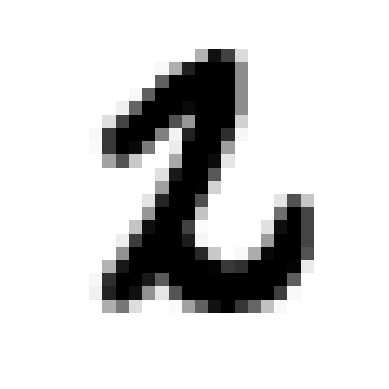

In [6]:
# wyświetlenie próbki jako obrazu

plt.imshow(X_train[6211], cmap='gray_r')
plt.axis('off')

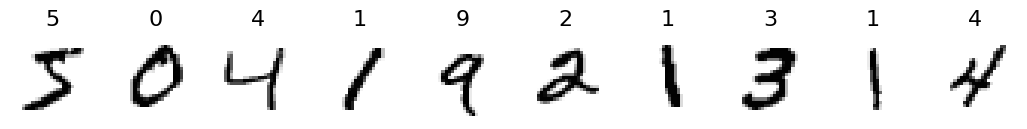

In [7]:
# wyświetlenie próbek wraz z etykietami

plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='black', fontsize=16)
plt.show()

# Budowa sieci.

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # metoda add() dodaje warstwę
# w pierwszej warstwie obowiązkowo podajemy rozmiar danych wejściowych
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))
# w ostatniej warstwie liczba neuronów musi odpowiadać liczbie klas (w klasyfikacji wieloklasowej)
# należy też zastosować odpowiednią funkcję aktywacji

# kompilacja modelu

model.compile(optimizer='adam', # optymalizator
              loss='sparse_categorical_crossentropy', # funkcja straty
              metrics=['accuracy']) # metryka ewaluacji modelu

model.summary() # metoda podsumowująca budowę modelu

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# Trening i ocena modelu.

In [9]:
history = model.fit(X_train, y_train, epochs=5) # wynik treningu przypisujemy do zmiennej

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8615 - loss: 0.4805
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9563 - loss: 0.1498
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9671 - loss: 0.1107
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9730 - loss: 0.0872
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9766 - loss: 0.0734


In [10]:
# ocena modelu na zbiorze testowym

model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9773 - loss: 0.0749


[0.07485096156597137, 0.9772999882698059]

In [11]:
# DataFrame wyświetlający metryki modelu

metrics = pd.DataFrame(history.history)
metrics

,accuracy,loss
0,0.914483,0.296053
1,0.957550,0.142498
2,0.968367,0.107376
3,0.972817,0.087460
4,0.976250,0.075403


In [12]:
# wykres treningu

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

# Predykcja na podstawie modelu.

In [13]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.000000033991, 0.000000013469, 0.000082252605, ..., 0.9998479     , 0.000000194729, 0.000001145634],
       [0.000000571334, 0.000010162375, 0.99998206    , ..., 0.            , 0.000000491362, 0.            ],
       [0.000000120606, 0.9980682     , 0.000096203854, ..., 0.0015874287  , 0.00016986829 , 0.00000169434 ],
       ...,
       [0.            , 0.000000000009, 0.000000000022, ..., 0.00000115969 , 0.000001790497, 0.000003009384],
       [0.000000888337, 0.000000000752, 0.000000001168, ..., 0.000000000272, 0.00047133004 , 0.000000000259],
       [0.00000000089 , 0.            , 0.00000079011 , ..., 0.            , 0.000000000953, 0.000000000013]],
      dtype=float32)

In [14]:
# predykcja klasy

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [15]:
# DataFrame porównujący predykcję z prawdą

pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [16]:
# błędy w klasyfikacji

misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Index([149, 151, 241, 247, 259, 320, 321, 340, 381, 445], dtype='int64')

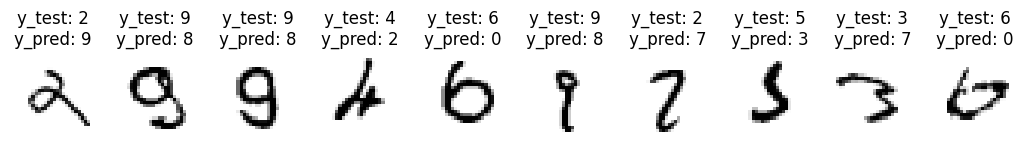

In [17]:
# wykres pokazujący błędy w klasyfikacji - predykcja i prawdziwa etykieta

plt.figure(figsize=(13, 13))
for i, j in zip(range(1, 11), misclassified.index[:10]):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_test[j], cmap='gray_r')
    plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color='black', fontsize=12)
plt.show()